# Pooling layer
Visualize how maxpooling layer is in CNN

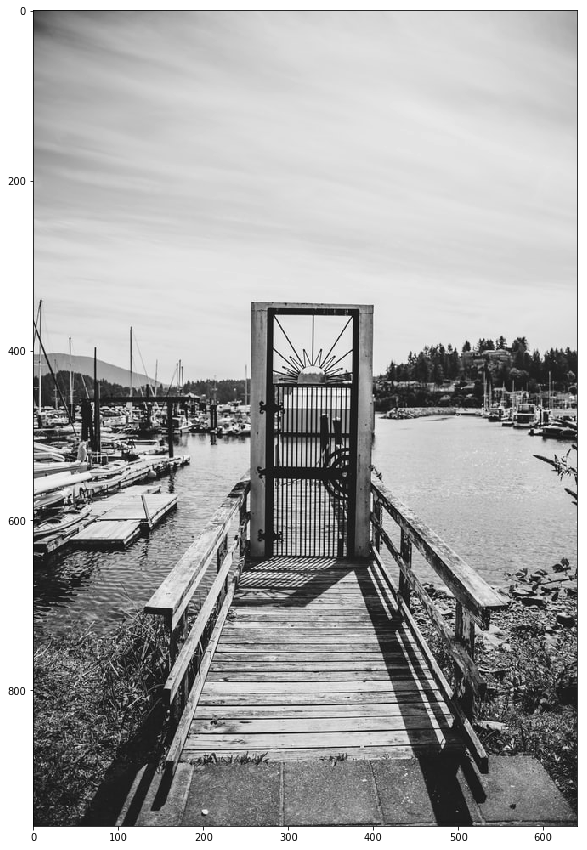

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("images/gate-anastase-maragos.jpg")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img.astype("float32")/255

plt.figure(figsize=(30, 15))
plt.imshow(gray_img, cmap="gray")
plt.show();

In [14]:
filter_vals = np.array([[1, 2, 4, -2, -1], [2, 4, 8, -4, -2], [8, 16, 32, -16, -8], [2, 4, 8, -4, -2], [1, 2, 4, -2, -1]])
print("Filter shapes: {}" .format(filter_vals.shape))

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
print("Filter 1: {}" .format(filters[0]))

Filter shapes: (5, 5)
Filter 1: [[  1   2   4  -2  -1]
 [  2   4   8  -4  -2]
 [  8  16  32 -16  -8]
 [  2   4   8  -4  -2]
 [  1   2   4  -2  -1]]


# Define convs and pooling layers


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define network with conv and four filters and pooling layer (5, 5)

class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        self.pool = nn.MaxPool2d(5, 5)
        
    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        
        return conv_x, activated_x, pooled_x

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
)


# Visualize the output of each filter


In [11]:
def viz_layer(layer, n_filters = 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(layer[0, i].data.numpy()), cmap="gray")
        ax.set_title("Output {}" .format(i+1))

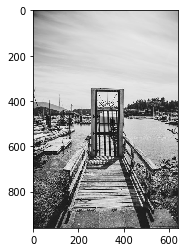

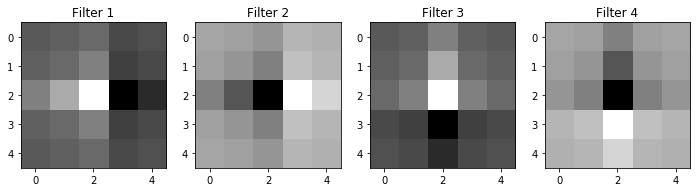

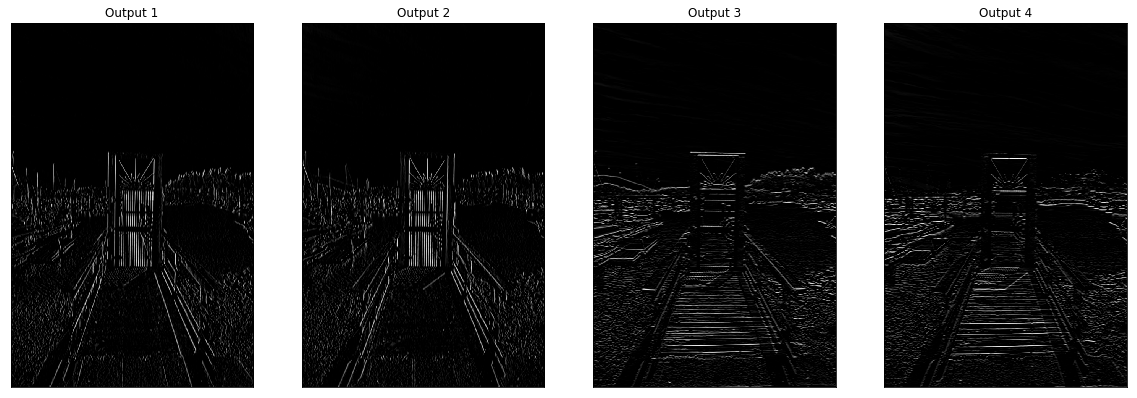

In [15]:
plt.imshow(gray_img, cmap="gray")

# Visualize all filters
fig = plt.figure(figsize=(12, 6))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1)
    ax.imshow(filters[i], cmap="gray")
    ax.set_title("Filter {}" .format(i+1))

# Convert img into input tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# Get all the layers
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# Visualize the output of activated
viz_layer(activated_layer)

# Output of the pooling layer

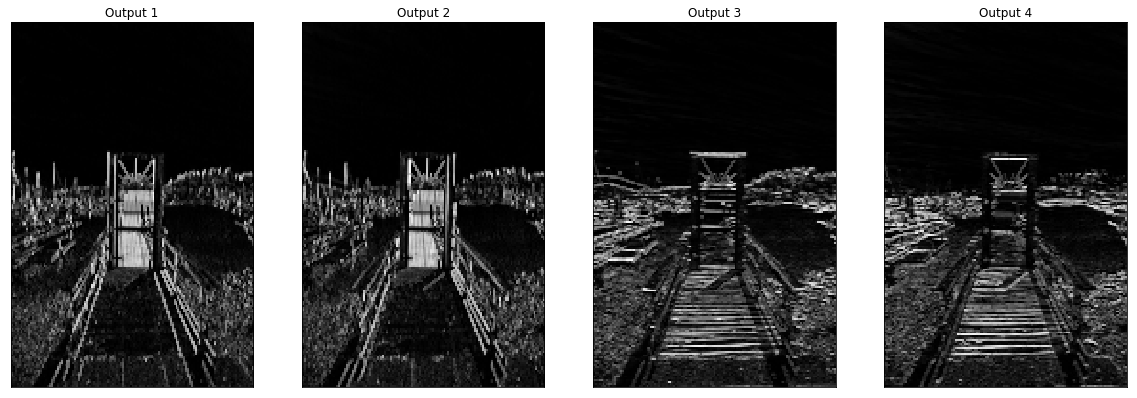

In [16]:
viz_layer(pooled_layer)